In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from rhythmplot import *

# Or manually define DATADIR = '/path/to/the/dir/with/all/datasets'
# from config import DATA_DIR

# Function to save figures: you can easily toggle this on/off globally
savefig = get_figure_saver(group='analysis', save_pdf=True, save_png=True)

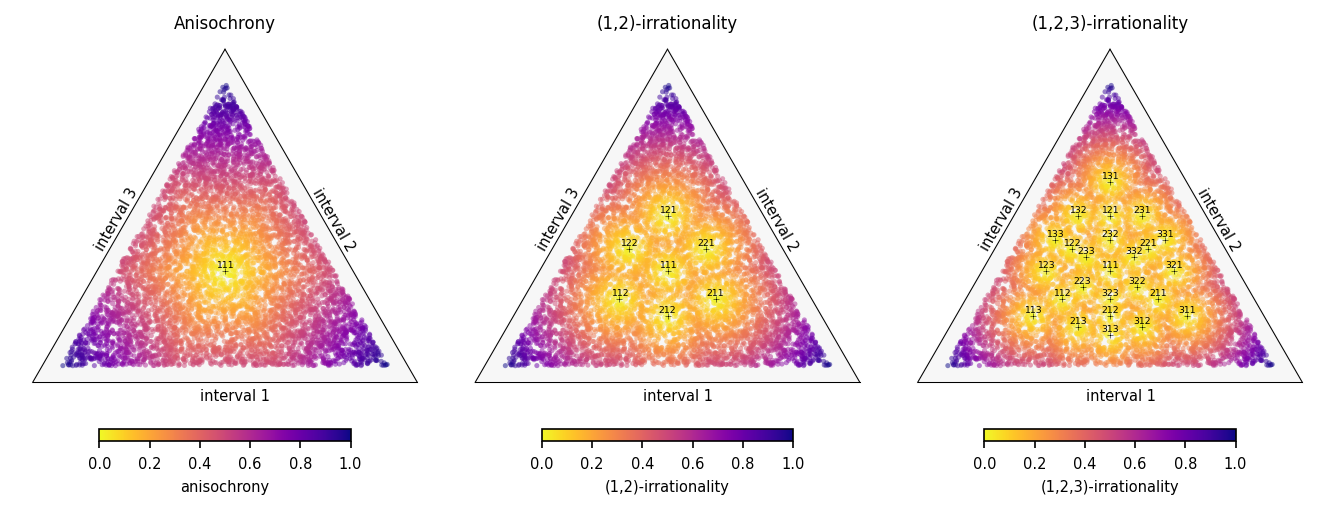

In [2]:
samples = uniform_subsample_triangle(20000, margin=.05)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(9, 3.5), tight_layout=True)
kws = dict(min_dur=0, max_dur=2, scatter_kws=dict(s=6, alpha=.5), cmap='plasma_r', plot_kws=dict(bottom_label_offset=-.1))

ax0.set_title('Anisochrony', fontsize=8)
ternary_motif_plot(samples, np.ones(len(samples)), 
    c=anisochrony(samples), 
    ratio_kws=dict(factors=[1]),
    cbar_kws=dict(label='anisochrony'), 
    ax=ax0, **kws)

ax1.set_title('(1,2)-irrationality', fontsize=8)
ternary_motif_plot(samples, np.ones(len(samples)), 
    c=irrationality(samples, factors=[1, 2]), 
    ratio_kws=dict(factors=[1, 2]),
    cbar_kws=dict(label='(1,2)-irrationality'), 
    ax=ax1, **kws)

ax2.set_title('(1,2,3)-irrationality', fontsize=8)
ternary_motif_plot(samples, np.ones(len(samples)), 
    c=irrationality(samples, factors=[1, 2, 3]), 
    ratio_kws=dict(factors=[1, 2, 3]),
    cbar_kws=dict(label='(1,2,3)-irrationality'), 
    ax=ax2, **kws)

savefig('anisochrony')

## Measure for datasets

In [3]:
import seaborn as sns

In [4]:
datasets = dict(
    cuban_salsa = load_intervals('roeske2020', 'cuban_salsa'),
    malian_jembe = load_intervals('roeske2020', 'malian_jembe'),
    north_indian_raga = load_intervals('roeske2020', 'north_indian_raga'),
    persian_zarb = load_intervals('roeske2020', 'persian_zarb'),
    tunisian_stembeli = load_intervals('roeske2020', 'tunisian_stambeli'),
    uruguayan_candombe = load_intervals('roeske2020', 'uruguayan_candombe'),
    western_piano = load_intervals('roeske2020', 'western_piano'),
    # iemp_css = load_intervals('iemp_css', 'iemp_css-concatenated'),
    nightingale = load_intervals('roeske2020', 'nightingale_songs'),
    zebra_finch = load_intervals('roeske2020', 'zebrafinch'),
    degregorio = load_intervals('degregorio2021', 'degregorio2021'),
    fernandez = load_intervals('fernandez2021', 'fernandez2021'),
    s_bil = load_intervals('burchardt-knornschild2020', 'bat-saccopteryx-bilineata'),
    c_persp = load_intervals('burchardt-knornschild2020', 'bat-carollia-perspicillata'),
    sperm_whale = load_intervals('burchardt-knornschild2020', 'whale-physeter-macrocephalus'),
    kwa = load_intervals('burchardt2021', 'kwa'),
    ophidion_rochei = load_intervals('burchardt2021', 'ophidion-rochei'),
    sciaena_umbra = load_intervals('burchardt2021', 'sciaena-umbra'),
    filer = load_intervals('filer2021', 'filer2021'),
)

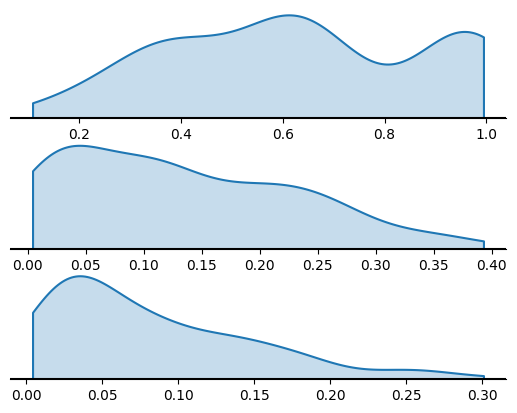

In [5]:
def show_kde(scores, ax=None, **kws):
    if ax is None: ax = plt.gca()
    sns.kdeplot(scores, **defaults(kws, ax=ax, fill=True, lw=1.5, cut=0))
    sns.despine(ax=ax, left=True)
    ax.set_yticks([])
    ax.set_ylabel('')
    # ax.axis('off')
    ax.axhline(0, lw=1.5, color=kws.get('color', 'k'))

def show_scores(intervals, axs, **kwargs):
    motifs, _ = normalize(ngram_motifs(intervals, length=3))

    anisochronies = anisochrony(motifs)
    show_kde(1 - anisochronies, ax=axs[0], **kwargs)
    
    two_irrationality = irrationality(motifs, factors=[1, 2])
    show_kde(two_irrationality, ax=axs[1], **kwargs)

    three_irrationality = irrationality(motifs, factors=[1, 2, 3])
    show_kde(three_irrationality, ax=axs[2], **kwargs)

fig, axs = plt.subplots(3, 1)
show_scores(datasets['kwa'], axs=axs)

(0.0, 0.1)

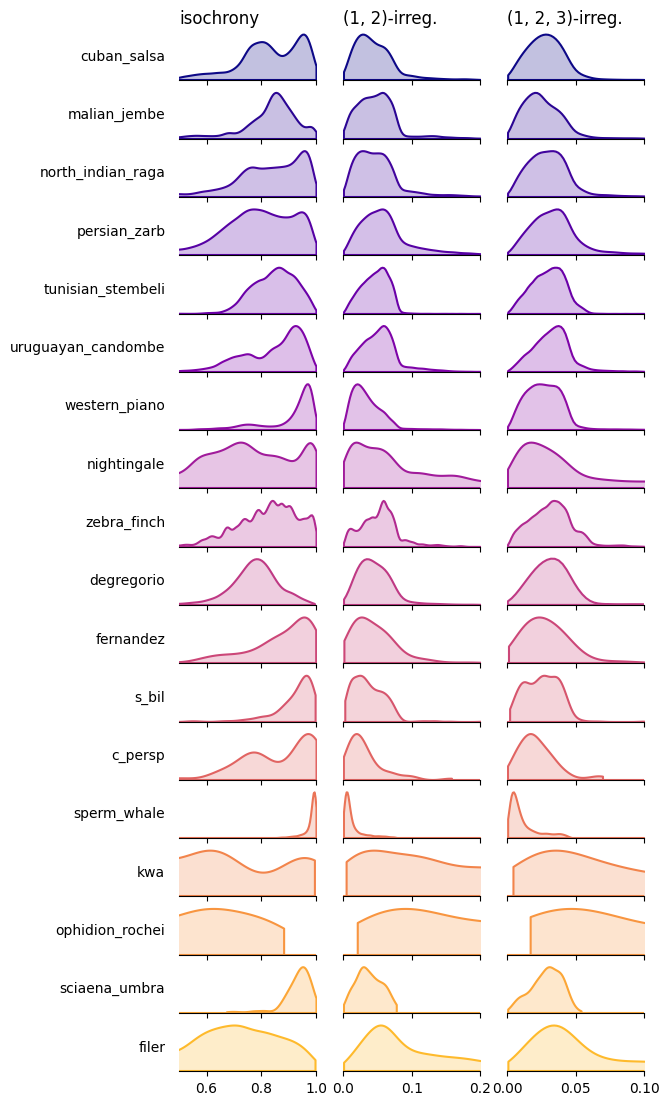

In [6]:
from matplotlib.colors import Normalize

fig, axs = plt.subplots(len(datasets), 3, figsize=(6, len(datasets)*.75), sharex='col')

cmap = plt.get_cmap('plasma')
norm = Normalize(0, len(datasets) + 2)
for i, (dataset, intervals) in enumerate(datasets.items()):
    # if i > 3: continue
    show_scores(intervals, axs=axs[i, :], color=cmap(norm(i)))
    axs[i, 0].annotate(
        dataset, 
        xy=(0, 0.5), xycoords='axes fraction', 
        xytext=(-10, 0), textcoords='offset points',
        va='center', ha='right')

axs[0,0].set_title('isochrony', ha='left', x=0)
axs[0,1].set_title('(1, 2)-irreg.', ha='left', x=0)
axs[0,2].set_title('(1, 2, 3)-irreg.', ha='left', x=0)

# for i in range(lan)
axs[0, 0].set_xlim(.5, 1)
axs[0, 1].set_xlim(0, .2)
axs[0, 2].set_xlim(0, .1)

In [7]:
def format_pval(p: float, tol = 1e-6) -> str:
    """Return a concisely formatted version of the p value

    Parameters
    ----------
    p : float
        The p value
    tol : Optional[float], optional
        Values below this are considered 0, by default 1e-8

    Returns
    -------
    str
        a formatted p value
    """
    if np.isnan(p):
        return 'NA'
    elif p >= 0.1:
        out = f'{p:.1f}'
        if out == '1.0':
            out  = '1'
        return out
    elif p >= 0.05:
        return f'{p:.2f}'
    elif p < 0.0001:
        return '***'
    elif p < 0.001:
        return '**'
    elif p < 0.05:
        return '*'

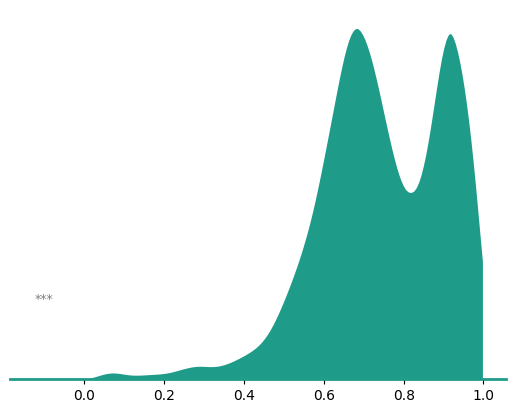

In [8]:
from diptest import diptest
from rhythmplot.plotting import get_pval_cmap

def show_n_gram_isochronies(intervals, length, ax=None, **kws):
    if ax is None: ax = plt.gca()
    motifs, _ = normalize(ngram_motifs(intervals, length=length))
    isochronies = 1 - anisochrony(motifs)
    
    p_val = diptest(isochronies)[1]
    if 'color' not in kws:
        cmap = get_pval_cmap(alpha=0.1, min_gray=.15)
        kws['color'] = cmap(p_val)
    color = kws['color']
    
    _kws = dict(ax=ax, fill=True, lw=1.5, cut=0, alpha=1, edgecolor='w', common_norm=True)
    p_text = ''
    if p_val > 0.05:
        # Draw a white kde in the background so that the plot is not transparent
        sns.kdeplot(isochronies, **defaults(dict(color='w', lw=0, alpha=1), **_kws))
        _kws.update(alpha=.6)
    
    ax.annotate(format_pval(p_val), 
        xy=(.05, .2), xycoords="axes fraction",
        ha='left', va='bottom', color='0.5', fontsize=9)

    kws = defaults(kws, **_kws)
    sns.kdeplot(isochronies, **kws)
    sns.despine(ax=ax, left=True)
    ax.set_yticks([])
    ax.set_ylabel('')
    # ax.axhline(0, lw=1.5, color=_kws.get('color', 'k'))
    ax.patch.set_visible(False) # transparent background
    ax.spines['bottom'].set_color(kws['color'])
    ax.spines['bottom'].set_linewidth(2)

show_n_gram_isochronies(datasets['degregorio'], 2)

/Users/bas/repos/papers/rhythm-triangles/env/lib/python3.7/site-packages/diptest/diptest.py:152: UserWarning: Dip test is not valid for n <= 3
  warnings.warn('Dip test is not valid for n <= 3')


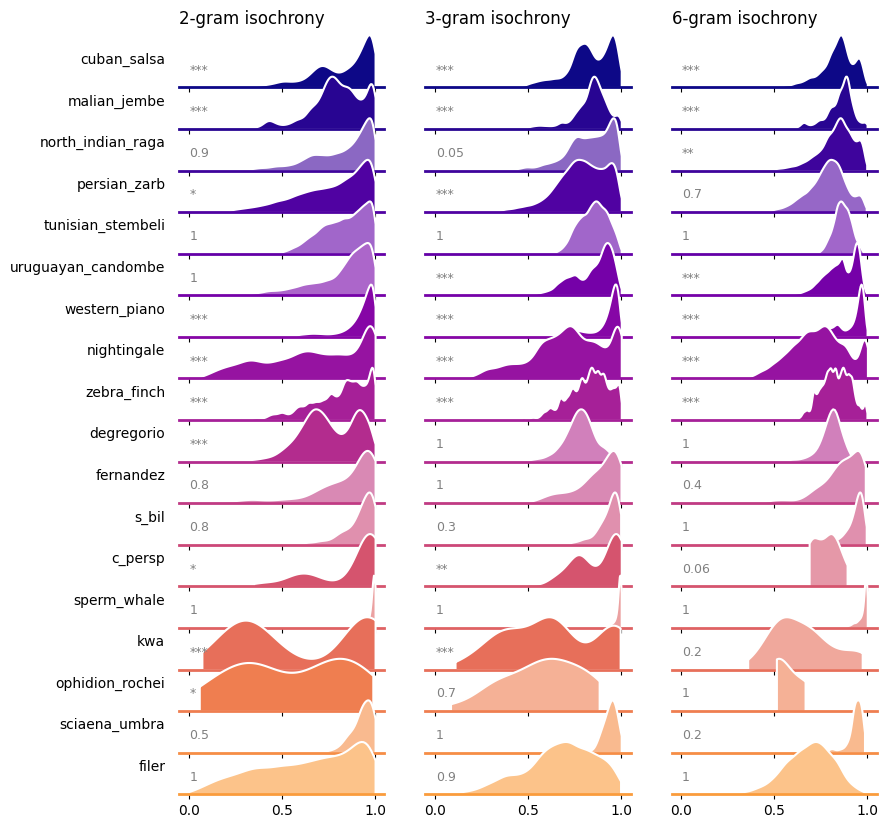

In [9]:
from matplotlib.colors import Normalize
N = len(datasets)
fig, axs = plt.subplots(N, 3, figsize=(9, N*.55), sharex='col')

cmap = plt.get_cmap('plasma')
norm = Normalize(0, N + 4)
for i, (dataset, intervals) in enumerate(datasets.items()):
    if i >= N: continue
    kwargs = dict(color=cmap(norm(i)))

    show_n_gram_isochronies(intervals, 2, ax=axs[i, 0], **kwargs)
    show_n_gram_isochronies(intervals, 3, ax=axs[i, 1], **kwargs)
    show_n_gram_isochronies(intervals, 6, ax=axs[i, 2], **kwargs)
    
    axs[i, 0].annotate(
        dataset, 
        xy=(0, 0.5), xycoords='axes fraction', 
        xytext=(-10, 0), textcoords='offset points',
        va='center', ha='right')

axs[0,0].set_title('2-gram isochrony', ha='left', x=0)
axs[0,1].set_title('3-gram isochrony', ha='left', x=0)
axs[0,2].set_title('6-gram isochrony', ha='left', x=0)

# for i in range(lan)
axs[0, 0].set_xlim(-.05, 1.05)
axs[0, 1].set_xlim(-.05, 1.05)
axs[0, 2].set_xlim(-.05, 1.05)

fig.subplots_adjust(hspace=-.25)
savefig('isochronies')